In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import scipy.io
import os
from util import *

In [3]:
def get_global_index( domain, numCoeffs, voxel_i, voxel_j, coeff ):
    '''Returns the equation index for the given h coeffient at the given voxel.'''
    voxel = voxel_j*domain.res_x + voxel_i
    return voxel*numCoeffs + coeff
def visualize_solution( filename ):

    domain = Domain2D(7.0, 70)
    numVoxels = domain.res_x*domain.res_y

    # load solution
    mat_data = scipy.io.loadmat(filename)
    x = mat_data["x"]
    numCoeffs = mat_data["numCoeffs"]

    u0 = np.zeros( (domain.res_x, domain.res_y) )

    for voxel_i in range(domain.res_y):
        for voxel_j in range(domain.res_x):
            i = get_global_index(domain, numCoeffs, voxel_i, voxel_j, 0)
            value = x[i]
            #if abs(value) < 0.0:
            #    value = 0.00001
            u0[voxel_i, voxel_j] = value

    u0 = np.abs(u0)


    vmin = 1.0e-8
    vmax = np.max(u0)*1.0

    plt.imshow(u0.T, interpolation="nearest", cmap='jet', norm=LogNorm(vmin=vmin, vmax=vmax), origin='lower')
def visualize_field( filename, field_name, vmin = 1.0e-8, vmax = 1.0 ):

    domain = Domain2D(7.0, 70)
    numVoxels = domain.res_x*domain.res_y

    # load solution
    mat_data = scipy.io.loadmat(filename)
    field = mat_data[field_name]

    plt.imshow(field.T, interpolation="nearest", cmap='jet', origin='lower', vmin=vmin, vmax=vmax)

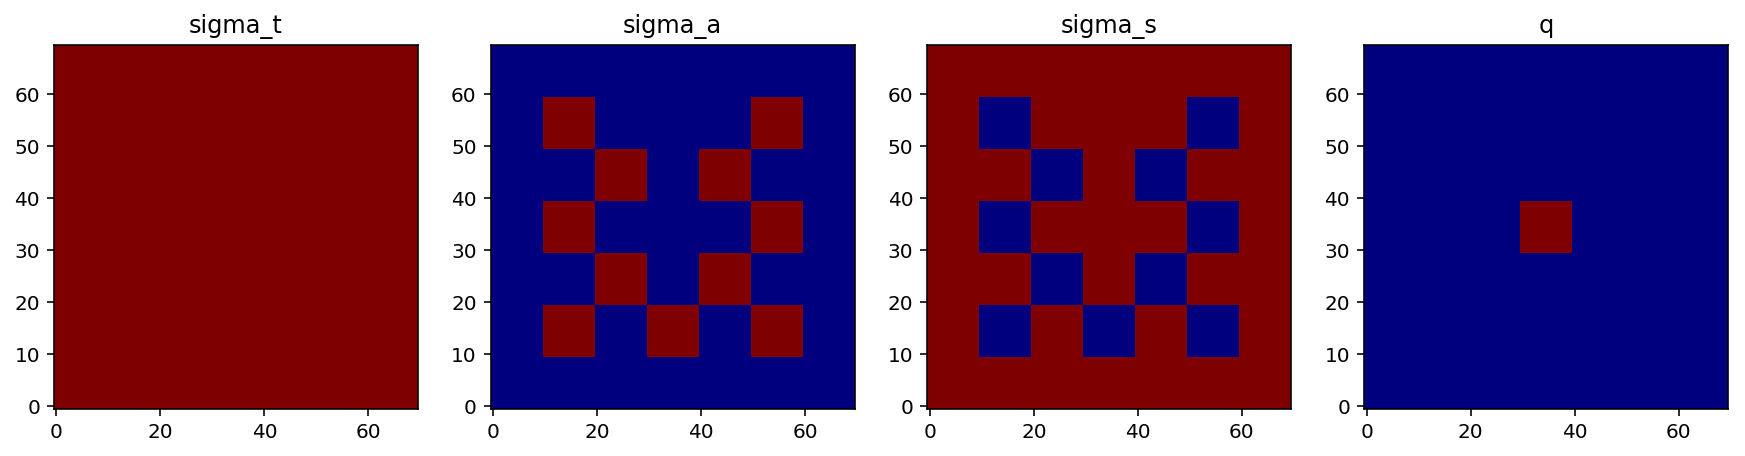

In [3]:
fig = plt.figure(figsize=(15, 15));
plt.subplot(141)
plt.title('sigma_t')
visualize_field("C:/projects/epfl/epfl17/python/sopn/problem.mat", "sigma_t")
plt.subplot(142)
plt.title('sigma_a')
visualize_field("C:/projects/epfl/epfl17/python/sopn/problem.mat", "sigma_a")
plt.subplot(143)
plt.title('sigma_s')
visualize_field("C:/projects/epfl/epfl17/python/sopn/problem.mat", "sigma_s")
plt.subplot(144)
plt.title('q')
visualize_field("C:/projects/epfl/epfl17/python/sopn/problem.mat", "q")
plt.show()

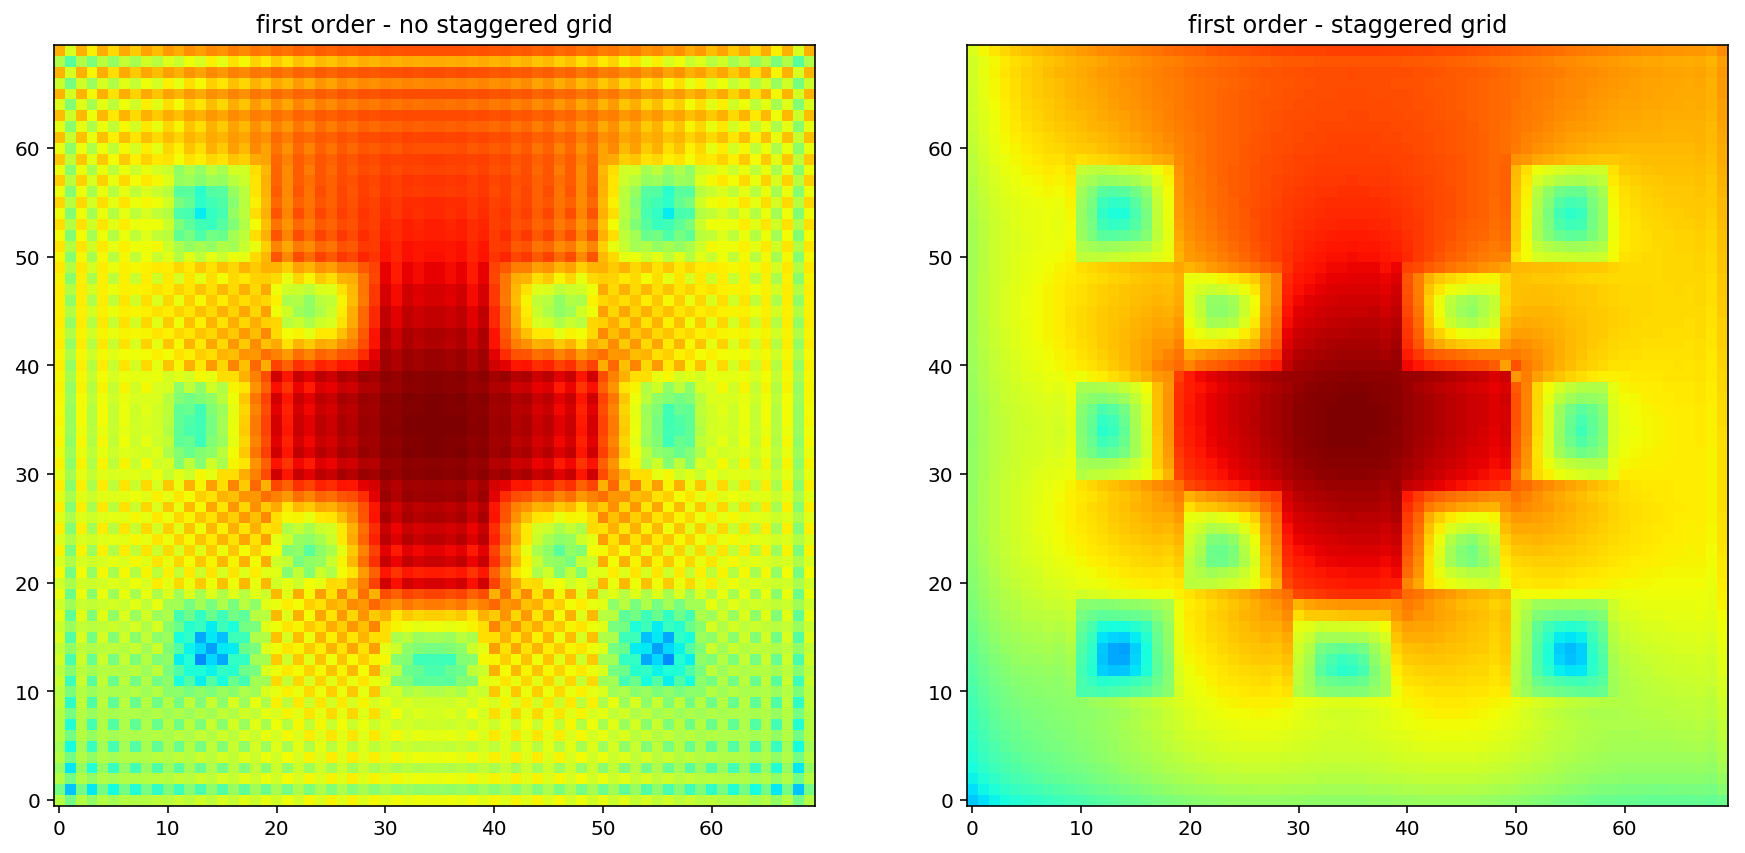

In [40]:
fig = plt.figure(figsize=(15, 15));
plt.subplot(121)
plt.title('first order - no staggered grid')
visualize_solution("C:/projects/epfl/epfl17/python/sopn/x_firstorder.mat")
plt.subplot(122)
plt.title('first order - staggered grid')
visualize_solution("C:/projects/epfl/epfl17/python/sopn/x_firstorder_staggered.mat")
plt.show();

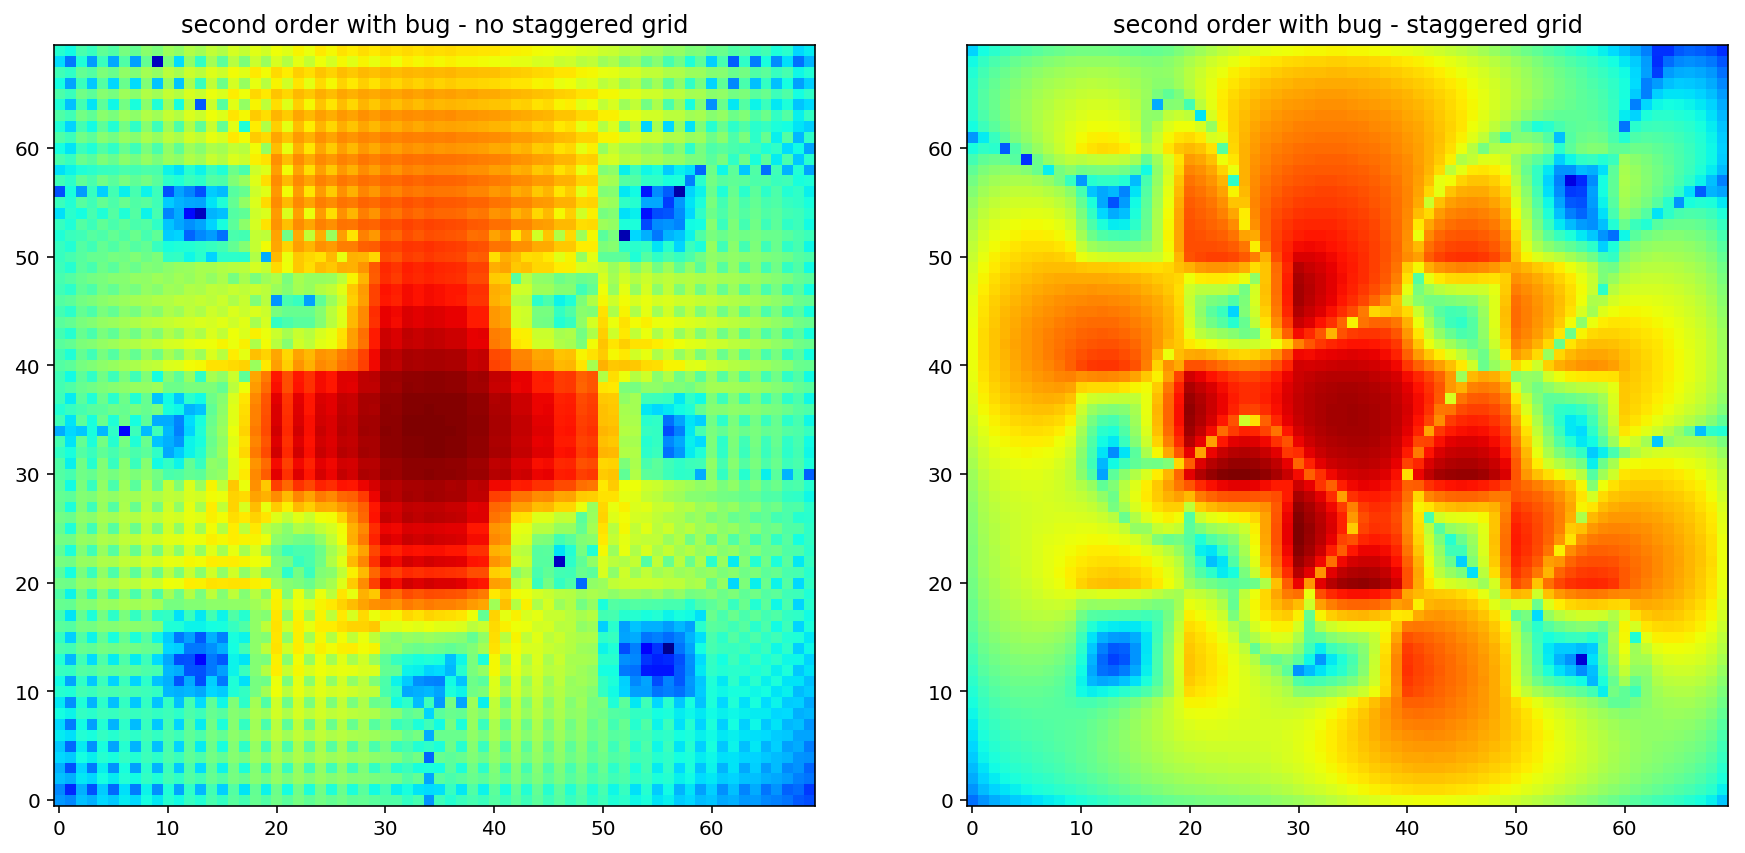

In [31]:
fig = plt.figure(figsize=(15, 15));
plt.subplot(121)
plt.title('second order with bug - no staggered grid')
visualize_solution("C:/projects/epfl/epfl17/python/sopn/x_lspn_bug.mat")
plt.subplot(122)
plt.title('second order with bug - staggered grid')
visualize_solution("C:/projects/epfl/epfl17/python/sopn/x_lspn_bug_staggered.mat")
plt.show();

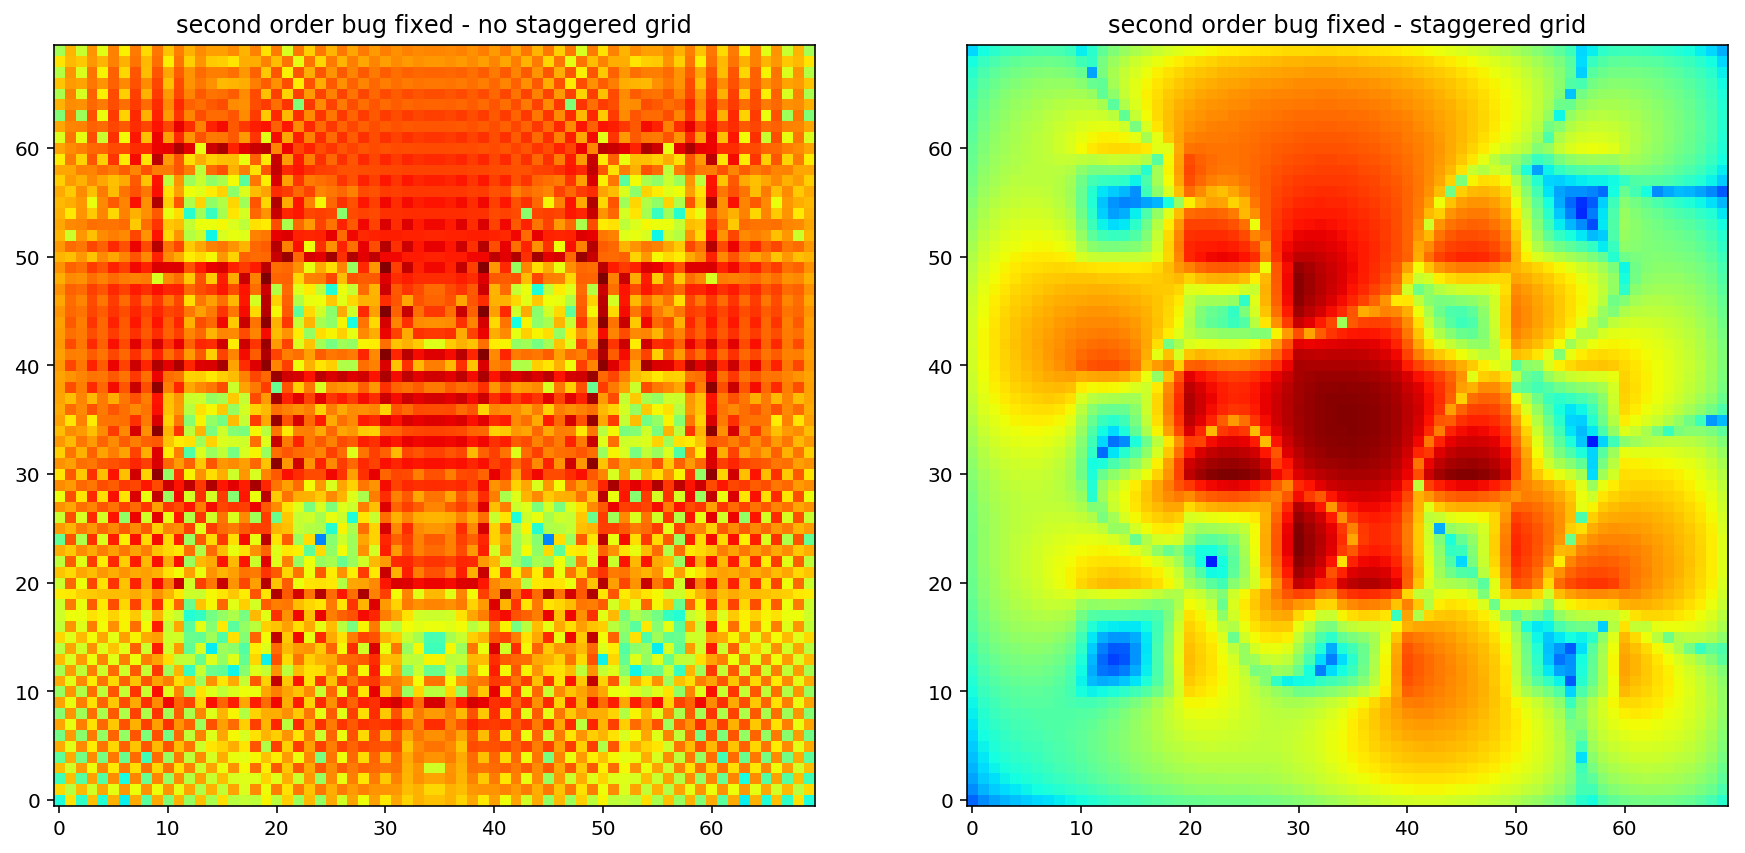

In [32]:
fig = plt.figure(figsize=(15, 15));
plt.subplot(121)
plt.title('second order bug fixed - no staggered grid')
visualize_solution("C:/projects/epfl/epfl17/python/sopn/x_lspn_corrected.mat")
plt.subplot(122)
plt.title('second order bug fixed - staggered grid')
visualize_solution("C:/projects/epfl/epfl17/python/sopn/x_lspn_corrected_staggered.mat")
plt.show();

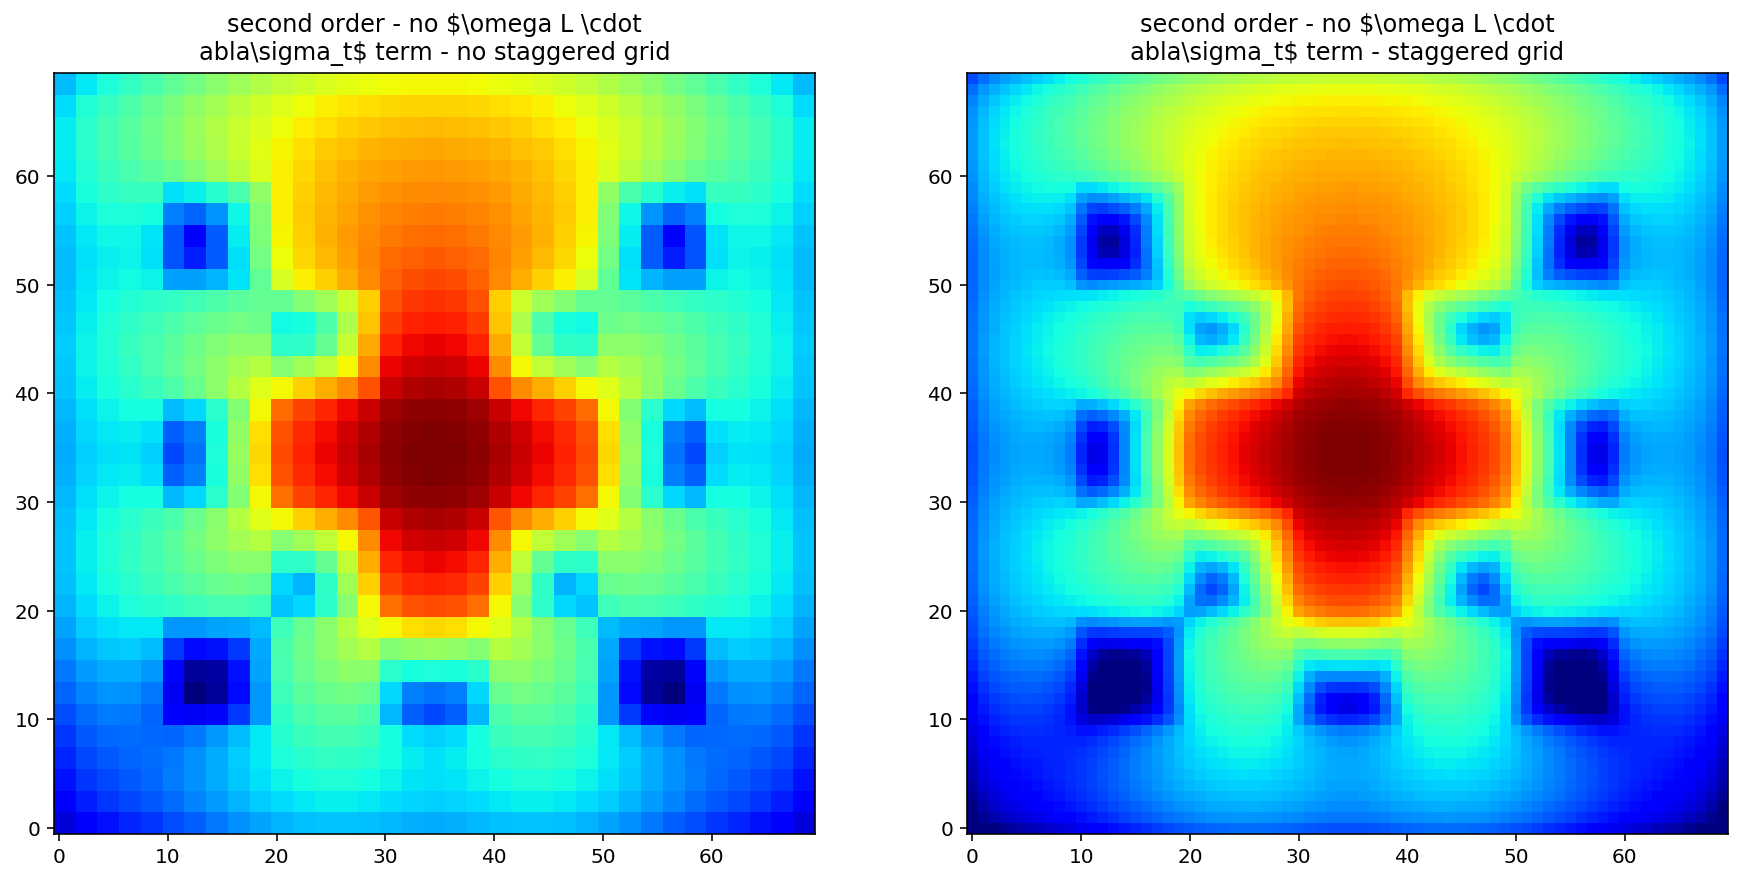

In [38]:
fig = plt.figure(figsize=(15, 15));
plt.subplot(121)
plt.title('second order - no $\omega L \cdot\nabla\sigma_t$ term - no staggered grid')
visualize_solution("C:/projects/epfl/epfl17/python/sopn/x_lspn_noddt.mat")
plt.subplot(122)
plt.title('second order - no $\omega L \cdot\nabla\sigma_t$ term - staggered grid')
visualize_solution("C:/projects/epfl/epfl17/python/sopn/x_lspn_noddt_staggered.mat")
plt.show();

In [ ]:
mat_data_test = scipy.io.loadmat("C:/projects/epfl/epfl17/python/sopn/data_lspn_test.mat")
mat_data_test_broken = scipy.io.loadmat("C:/projects/epfl/epfl17/python/sopn/data_lspn_test_broken.mat")
b = mat_data_test['b_new']
b_broken = mat_data_test_broken['b_new_broken']

A = mat_data_test['A_new']
A_broken = mat_data_test_broken['A_new_broken']

for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        if A[i, j] != A_broken[i,j]:
            print("i={} j={} {} {}".format(i, j, A[i,j], A_broken[i,j]))


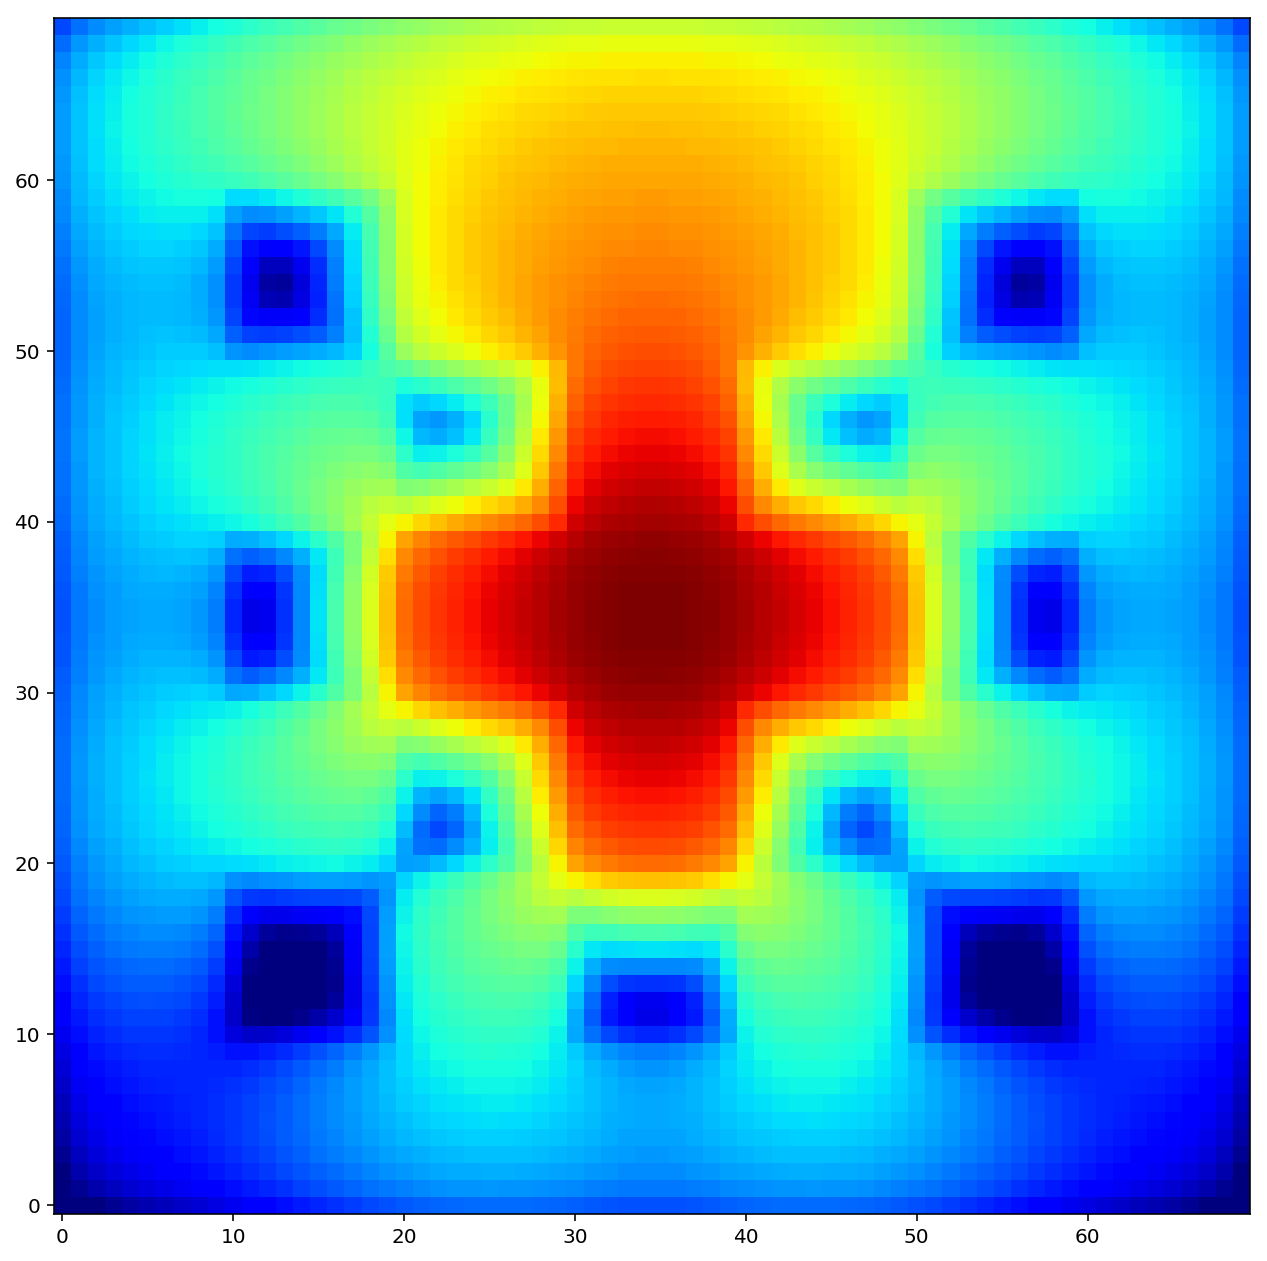

In [5]:
fig = plt.figure(figsize=(11, 11));
visualize_solution("C:/projects/epfl/epfl17/python/sopn/x_lspn_test3.mat")
plt.show();

In [30]:
def visualize_matrix_structure( filename ):

    domain = Domain2D(7.0, 70)
    numVoxels = domain.res_x*domain.res_y

    # load solution
    mat_data = scipy.io.loadmat(filename)
    A = mat_data["A"]
    numCoeffs = mat_data["numCoeffs"]

    u0 = np.zeros( (domain.res_x, domain.res_y) )

    numVoxels = domain.res_x*domain.res_y
    for voxel_i in range(domain.res_x):
        for voxel_j in range(domain.res_y):
            for voxel_i2 in range(domain.res_x):
                for voxel_j2 in range(domain.res_y):
                    voxel_done = False
                    for c_i in range(numCoeffs):
                        for c_j in range(numCoeffs):
                            i = get_global_index(domain, numCoeffs, voxel_i, voxel_j, c_i )
                            j = get_global_index(domain, numCoeffs, voxel_i2, voxel_j2, c_j )
                            if np.abs(A[i, j]) > 0.0:
                                u0[voxel_i, voxel_j] = 1.0
                                voxel_done = True
                            if voxel_done == True:
                                break
                        if voxel_done == True:
                            break
    vmin = 0
    vmax = 1

    plt.imshow(u0.T, interpolation="nearest", cmap='jet', origin='lower')

In [4]:
fig = plt.figure(figsize=(11, 11));
visualize_matrix_structure("C:/projects/epfl/epfl17/python/sopn/x_lspn_test3.mat")
plt.show();

NameError: name 'visualize_matrix_structure' is not defined

In [6]:
0.223945249854*3.5449077

0.7938652405858685